In [2]:
data = ''# paste your data location here

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score


In [4]:
df = pd.read_csv(data)
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
df.shape

(318438, 18)

In [6]:
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

# Feature by Feature Analysis


## case_id

In [8]:
df.case_id.head()

0    1
1    2
2    3
3    4
4    5
Name: case_id, dtype: int64

## Hospital Code

In [9]:
df['Hospital_code'].nunique()

32

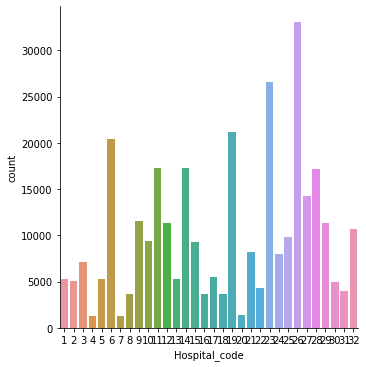

In [10]:
sns.catplot(x='Hospital_code',data=df,kind="count") 

## Hospital_type_code

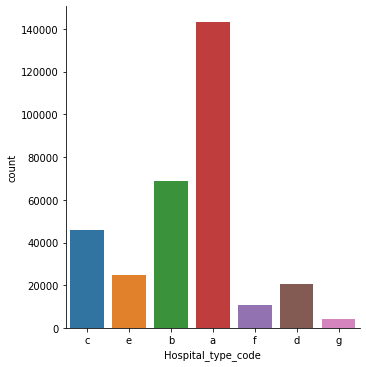

In [11]:
sns.catplot(x='Hospital_type_code',data=df,kind="count") 

## City_Code_Hospital

In [12]:
df.City_Code_Hospital.nunique()

11

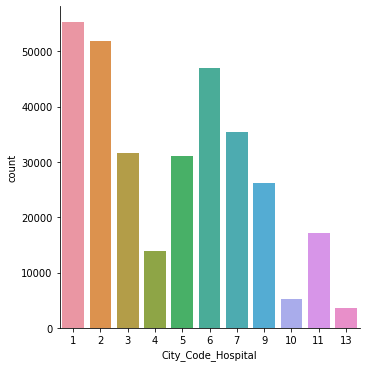

In [13]:
sns.catplot(x='City_Code_Hospital',data=df,kind="count") 

## Hospital_region_code

In [14]:
df.Hospital_region_code.nunique()

3

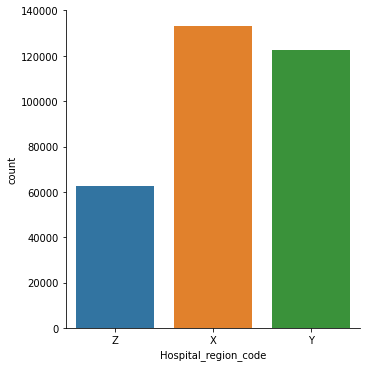

In [15]:
sns.catplot(x='Hospital_region_code',data=df,kind="count") 

## Available Extra Rooms in Hospital

In [16]:
df['Available Extra Rooms in Hospital'].unique()

array([ 3,  2,  1,  4,  6,  5,  7,  8,  9, 10, 12,  0, 11, 20, 14, 21, 13,
       24])

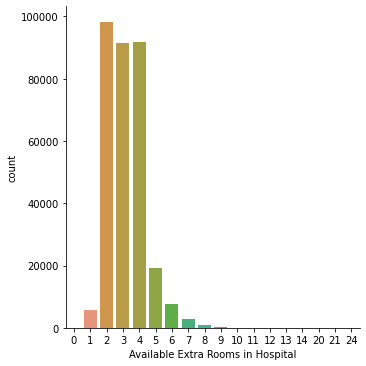

In [17]:
sns.catplot(x='Available Extra Rooms in Hospital',data=df,kind="count") 

In [18]:
df['Available Extra Rooms in Hospital'].value_counts()

2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
13        2
20        2
14        1
24        1
Name: Available Extra Rooms in Hospital, dtype: int64

## Department

In [19]:
df['Department'].unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [20]:
df['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

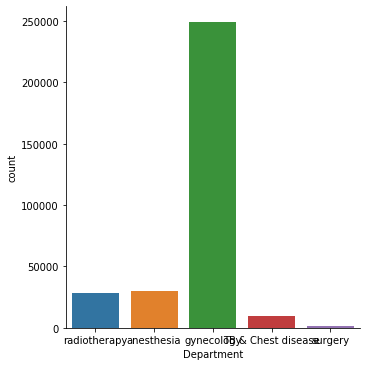

In [21]:
sns.catplot(x='Department',data=df,kind="count") 

## Ward_Type

In [22]:
df['Ward_Type'].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

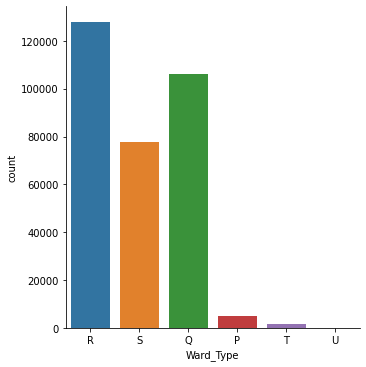

In [23]:
sns.catplot(x='Ward_Type',data=df,kind="count") 

## Ward_Facility_Code

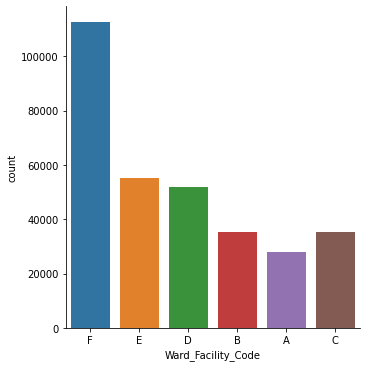

In [24]:
sns.catplot(x='Ward_Facility_Code',data=df,kind="count") 

## Bed Grade

In [25]:
df['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

## patientid

In [26]:
df['patientid'].nunique()

92017

## City_Code_Patient

In [27]:
df['City_Code_Patient'].nunique()

37

## Type of Admission

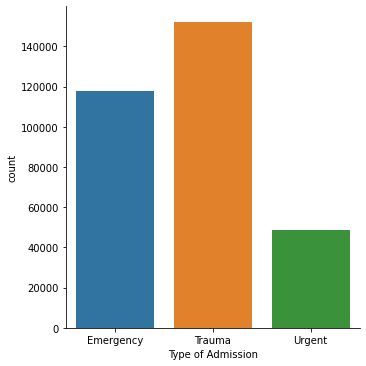

In [28]:
sns.catplot(x='Type of Admission',data=df,kind="count") 

## Severity of Illness

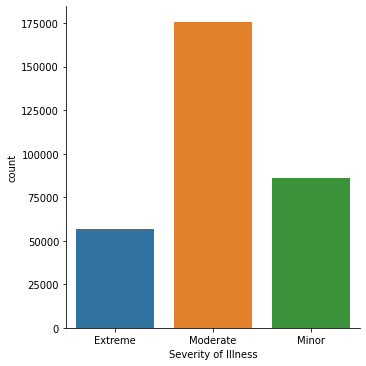

In [29]:
sns.catplot(x='Severity of Illness',data=df,kind="count") 

## Visitors with Patient

In [30]:
df['Visitors with Patient'].nunique()

28

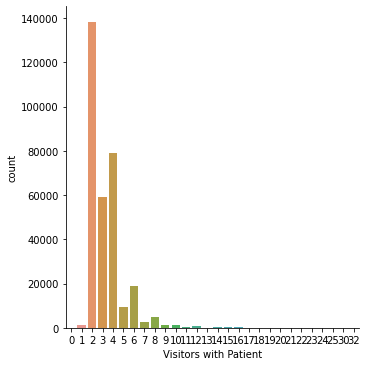

In [31]:
sns.catplot(x='Visitors with Patient',data=df,kind="count") 

## Age

In [32]:
df['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

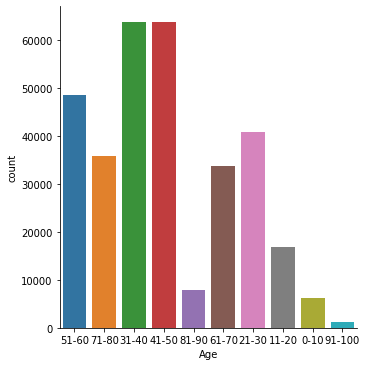

In [33]:
sns.catplot(x='Age',data=df,kind="count") 

## Admission_Deposit

In [34]:
df['Admission_Deposit'].nunique()

7300

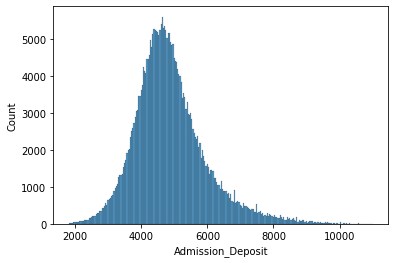

In [35]:
sns.histplot(data=df['Admission_Deposit'])

Total: 4952


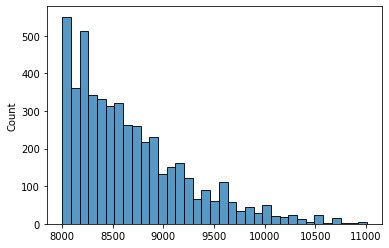

In [36]:
data = [i for i in df['Admission_Deposit'] if i > 8000]
sns.histplot(data=data)
print("Total:",len(data))

Total: 1154


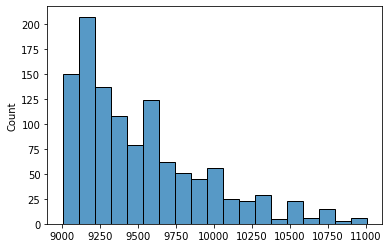

In [37]:
data = [i for i in df['Admission_Deposit'] if i > 9000]
sns.histplot(data=data)
print("Total:",len(data))

## stay

In [38]:
df['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

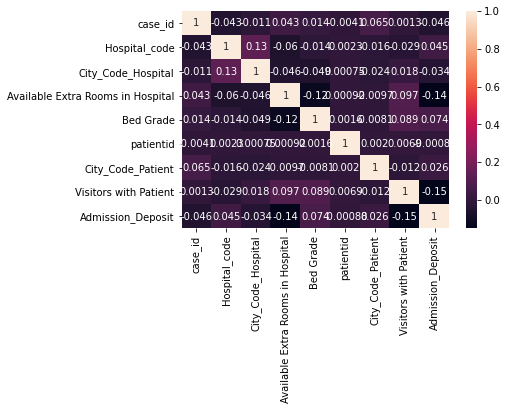

In [39]:
corr = df.corr()
sns.heatmap(corr, annot=True)

# Acting on the inferences drawn

In [40]:
df = df.drop(['case_id','Hospital_code','patientid','City_Code_Patient','Admission_Deposit'],axis=1)
df.head()

,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Stay
0,c,3,Z,3,radiotherapy,R,F,2.0,Emergency,Extreme,2,51-60,0-10
1,c,5,Z,2,radiotherapy,S,F,2.0,Trauma,Extreme,2,51-60,41-50
2,e,1,X,2,anesthesia,S,E,2.0,Trauma,Extreme,2,51-60,31-40
3,b,2,Y,2,radiotherapy,R,D,2.0,Trauma,Extreme,2,51-60,41-50
4,b,2,Y,2,radiotherapy,S,D,2.0,Trauma,Extreme,2,51-60,41-50


In [41]:
df.isna().sum()

Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                            113
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Stay                                   0
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df['Department'] = df['Department'].replace('surgery','anesthesia')
df['Ward_Type'] = df['Ward_Type'].replace('U','T')

In [44]:
df['Severity of Illness'] = df['Severity of Illness'].map({'Extreme':2, 'Moderate':1, 'Minor':0})
df['Visitors with Patient'] = df['Visitors with Patient'].apply(lambda x: 1 if x > 0 else 0)
df['Age'] = df['Age'].map({'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9})

In [45]:
df_Hospital_type_code = pd.get_dummies(df['Hospital_type_code'])
df_Hospital_region_code = pd.get_dummies(df['Hospital_region_code'])
df_Ward_Facility_Code = pd.get_dummies(df['Ward_Facility_Code'])
df_Type_of_Admission = pd.get_dummies(df['Type of Admission'])
df_Department = pd.get_dummies(df['Department'])
df_Ward_Type = pd.get_dummies(df['Ward_Type'])

df = pd.concat([df,df_Hospital_region_code,df_Hospital_type_code,df_Ward_Facility_Code,df_Type_of_Admission,df_Department,df_Ward_Type],axis=1)
df = df.drop(['Hospital_region_code','Hospital_type_code','Ward_Facility_Code','Type of Admission','Department','Ward_Type'],axis=1)

In [46]:
df['Bed Grade'] = df['Bed Grade'].astype(int)

In [47]:
df.head()

,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,Severity of Illness,Visitors with Patient,Age,Stay,X,Y,Z,a,b,c,d,e,f,g,A,B,C,D,E,F,Emergency,Trauma,Urgent,TB & Chest disease,anesthesia,gynecology,radiotherapy,P,Q,R,S,T
0,3,3,2,2,1,5,0-10,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
1,5,2,2,2,1,5,41-50,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1,2,2,2,1,5,31-40,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,2,2,2,2,1,5,41-50,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,2,2,2,2,1,5,41-50,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318325 entries, 0 to 318437
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   City_Code_Hospital                 318325 non-null  int64 
 1   Available Extra Rooms in Hospital  318325 non-null  int64 
 2   Bed Grade                          318325 non-null  int64 
 3   Severity of Illness                318325 non-null  int64 
 4   Visitors with Patient              318325 non-null  int64 
 5   Age                                318325 non-null  int64 
 6   Stay                               318325 non-null  object
 7   X                                  318325 non-null  uint8 
 8   Y                                  318325 non-null  uint8 
 9   Z                                  318325 non-null  uint8 
 10  a                                  318325 non-null  uint8 
 11  b                                  318325 non-null  

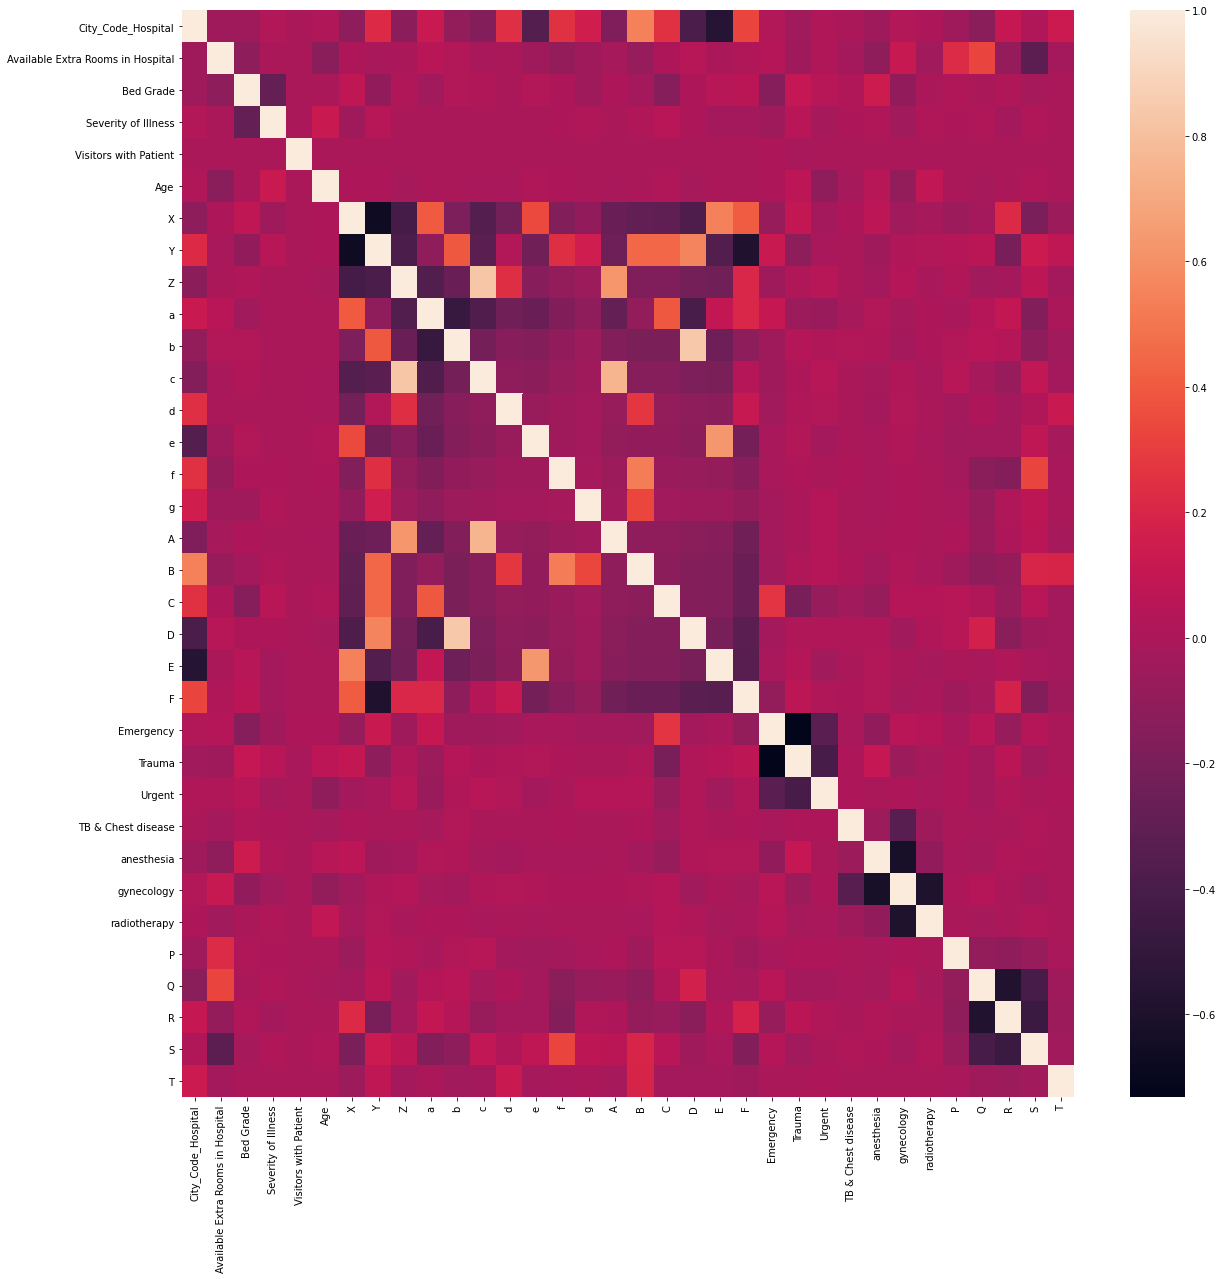

In [49]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr)

# Saving the Processed dataset

In [50]:
df.to_csv("StayDataset_processed.csv")